<a href="https://colab.research.google.com/github/Durgamadala/Anomaly_detection/blob/main/Anamoly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Anomaly Detection in IoT-Based Healthcare Networks using Deep Learning Models**

# **Installing Dependencies**

In [ ]:

!pip install tensorflow pandas numpy scikit-learn seaborn matplotlib

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf


from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LSTM, Conv1D, MaxPooling1D, Flatten, Dropout, concatenate, Reshape
from tensorflow.keras.callbacks import EarlyStopping

# Load the datasets
train_df = pd.read_csv("/content/train.csv")
val_df = pd.read_csv("/content/validation.csv")
test_df = pd.read_csv("/content/test.csv")


# **PreProcessing Steps**

In [ ]:
# Combining 3 files into 1 file
full_df = pd.concat([train_df, val_df, test_df])

# Check missing values
print(full_df.isnull().sum())

# Drop columns with too many missing values (if any) or fill NA
full_df.fillna(full_df.mean(numeric_only=True), inplace=True)

# Encode categorical labels if 'Label' is text
if full_df['label'].dtype == 'object':
    le = LabelEncoder()
    full_df['label'] = le.fit_transform(full_df['label'])

# Split back
train = full_df.iloc[:len(train_df)]
val = full_df.iloc[len(train_df):len(train_df)+len(val_df)]
test = full_df.iloc[-len(test_df):]

# Separate features and target
X_train, y_train = train.drop('label', axis=1), train['label']
X_val, y_val = val.drop('label', axis=1), val['label']
X_test, y_test = test.drop('label', axis=1), test['label']

# Normalize data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Reshape for CNN/LSTM (samples, timesteps, features)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_val = X_val.reshape((X_val.shape[0], 1, X_val.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))


flow_duration      0
Header_Length      0
Protocol Type      0
Duration           0
Rate               0
Srate              0
Drate              0
fin_flag_number    0
syn_flag_number    1
rst_flag_number    1
psh_flag_number    1
ack_flag_number    1
ece_flag_number    1
cwr_flag_number    1
ack_count          1
syn_count          1
fin_count          1
urg_count          1
rst_count          1
HTTP               1
HTTPS              1
DNS                1
Telnet             1
SMTP               1
SSH                1
IRC                1
TCP                1
UDP                1
DHCP               1
ARP                1
ICMP               1
IPv                1
LLC                1
Tot sum            1
Min                1
Max                1
AVG                2
Std                2
Tot size           3
IAT                3
Number             3
Magnitue           3
Radius             3
Covariance         3
Variance           3
Weight             3
label              3
dtype: int64


In [ ]:
full_df = pd.concat([train_df, val_df, test_df], ignore_index=True)


In [ ]:
full_df.fillna(full_df.mean(numeric_only=True), inplace=True)


In [ ]:
if full_df['label'].dtype == 'object':
    le = LabelEncoder()
    full_df['label'] = le.fit_transform(full_df['label'])


In [ ]:
full_df.head()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000000,757.00,6.00,64.00,23.671858,23.671858,0.0,0.0,0.0,0.0,...,538.470740,944.00,8.334058e+07,9.5,41.845546,761.456760,305219.322301,0.95,141.55,4
1,0.000000,54.00,6.00,64.00,2.393046,2.393046,0.0,0.0,1.0,0.0,...,0.000000,54.00,8.309327e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,10
2,0.033982,56.78,6.11,64.64,1.192715,1.192715,0.0,0.0,0.0,0.0,...,1.727526,54.29,8.333086e+07,9.5,10.462813,2.445286,16.853118,0.19,141.55,8
3,0.000000,0.00,47.00,64.00,9.841972,9.841972,0.0,0.0,0.0,0.0,...,0.000000,592.00,8.370278e+07,9.5,34.409301,0.000000,0.000000,0.00,141.55,23
4,3.944828,108.00,6.00,64.00,0.506993,0.506993,0.0,0.0,1.0,0.0,...,0.000000,54.00,8.297270e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,19


In [ ]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9018980 entries, 0 to 9018979
Data columns (total 47 columns):
 #   Column           Dtype  
---  ------           -----  
 0   flow_duration    float64
 1   Header_Length    float64
 2   Protocol Type    float64
 3   Duration         float64
 4   Rate             float64
 5   Srate            float64
 6   Drate            float64
 7   fin_flag_number  float64
 8   syn_flag_number  float64
 9   rst_flag_number  float64
 10  psh_flag_number  float64
 11  ack_flag_number  float64
 12  ece_flag_number  float64
 13  cwr_flag_number  float64
 14  ack_count        float64
 15  syn_count        float64
 16  fin_count        float64
 17  urg_count        float64
 18  rst_count        float64
 19  HTTP             float64
 20  HTTPS            float64
 21  DNS              float64
 22  Telnet           float64
 23  SMTP             float64
 24  SSH              float64
 25  IRC              float64
 26  TCP              float64
 27  UDP         

In [ ]:
full_df.columns

Index(['flow_duration', 'Header_Length', 'Protocol Type', 'Duration', 'Rate',
       'Srate', 'Drate', 'fin_flag_number', 'syn_flag_number',
       'rst_flag_number', 'psh_flag_number', 'ack_flag_number',
       'ece_flag_number', 'cwr_flag_number', 'ack_count', 'syn_count',
       'fin_count', 'urg_count', 'rst_count', 'HTTP', 'HTTPS', 'DNS', 'Telnet',
       'SMTP', 'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC',
       'Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number',
       'Magnitue', 'Radius', 'Covariance', 'Variance', 'Weight', 'label'],
      dtype='object')

In [ ]:
full_df.tail()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
9018975,0.020439,463.46,6.00,63.92,29.448976,29.448976,0.0,0.0,0.0,0.0,...,14.673244,110.08,8.292582e+07,9.5,10.586035,17.709474,7840.636454,0.02,141.55,20
9018976,0.000000,53.66,5.94,63.36,1.978707,1.978707,0.0,0.0,1.0,0.0,...,1.146215,54.26,8.308975e+07,9.5,10.429773,1.622961,6.351768,0.27,141.55,10
9018977,4.334558,176182.46,16.55,64.63,72.836269,72.836269,0.0,0.0,0.0,0.0,...,22.397555,537.06,8.370737e+07,9.5,32.918478,31.724952,4209.757083,0.12,141.55,25
9018978,0.083104,45811.00,17.00,64.00,11352.050561,11352.050561,0.0,0.0,0.0,0.0,...,0.000000,50.00,8.309785e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,14
9018979,24.978812,1661246.30,7.60,175.20,49.539657,49.539657,0.0,0.0,0.0,0.0,...,988.556468,130.20,1.665205e+08,13.5,41.305402,1399.959994,981525.969635,1.00,244.60,1


In [ ]:
full_df.describe()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
count,9.018980e+06,9.018980e+06,9.018980e+06,9.018980e+06,9.018980e+06,9.018980e+06,9.018980e+06,9.018980e+06,9.018980e+06,9.018980e+06,...,9.018980e+06,9.018980e+06,9.018980e+06,9.018980e+06,9.018980e+06,9.018980e+06,9.018980e+06,9.018980e+06,9.018980e+06,9.018980e+06
mean,5.676565e+00,7.675382e+04,9.068867e+00,6.636325e+01,9.073026e+03,9.073026e+03,5.603644e-06,8.645567e-02,2.071620e-01,9.040146e-02,...,3.344199e+01,1.248289e+02,8.318843e+07,9.498751e+00,1.312751e+01,4.726019e+01,3.086142e+04,9.660945e-02,1.415195e+02,1.256439e+01
std,2.691325e+02,4.612113e+05,8.946405e+00,1.406883e+01,1.001078e+05,1.001078e+05,9.455518e-03,2.810358e-01,4.052727e-01,2.867561e-01,...,1.606800e+02,2.419375e+02,1.706021e+07,8.199102e-01,8.639085e+00,2.272536e+02,3.262711e+05,2.332311e-01,2.108587e+01,5.858808e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,4.200000e+01,0.000000e+00,1.000000e+00,9.165151e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,0.000000e+00,5.400000e+01,6.000000e+00,6.400000e+01,2.094293e+00,2.094293e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,5.000000e+01,8.307157e+07,9.500000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.415500e+02,8.000000e+00
50%,0.000000e+00,5.400000e+01,6.000000e+00,6.400000e+01,1.579927e+01,1.579927e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,5.400000e+01,8.312452e+07,9.500000e+00,1.039230e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.415500e+02,1.200000e+01
75%,1.049422e-01,2.967525e+02,1.444000e+01,6.400000e+01,1.180751e+02,1.180751e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,3.753698e-01,5.406000e+01,8.334391e+07,9.500000e+00,1.039673e+01,5.059213e-01,1.369978e+00,8.000000e-02,1.415500e+02,1.500000e+01
max,9.943576e+04,9.905298e+06,4.700000e+01,2.550000e+02,8.388608e+06,8.388608e+06,2.805555e+01,1.000000e+00,1.000000e+00,1.000000e+00,...,1.099626e+04,1.309800e+04,1.676394e+08,1.500000e+01,1.453904e+02,1.555106e+04,1.372844e+08,1.000000e+00,2.446000e+02,3.300000e+01


In [ ]:
full_df.isna().sum()

,0
flow_duration,0
Header_Length,0
Protocol Type,0
Duration,0
Rate,0
Srate,0
Drate,0
fin_flag_number,0
syn_flag_number,0
rst_flag_number,0


In [ ]:
print(full_df.label)

0           4
1          10
2           8
3          23
4          19
           ..
9018975    20
9018976    10
9018977    25
9018978    14
9018979     1
Name: label, Length: 9018980, dtype: int64


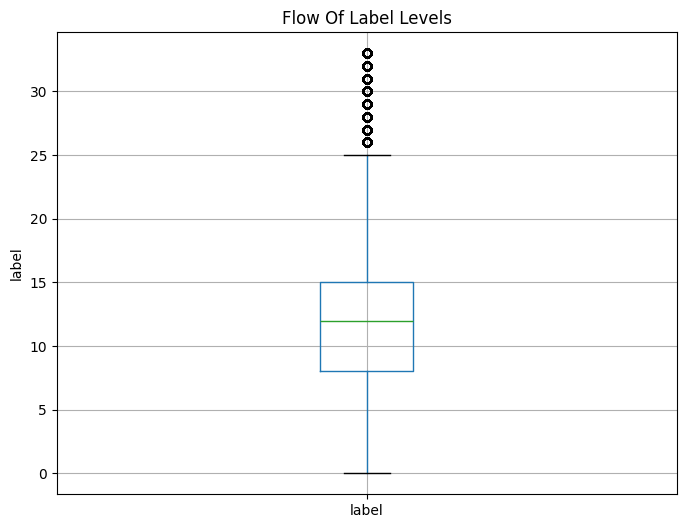

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
full_df.boxplot(column='label')
plt.title('Flow Of Label Levels')
plt.ylabel('label')
plt.show()

# **Model using** **CNN**, **LSTM** , **AutoEncoders**

In [ ]:
input_layer = Input(shape=(1, X_train.shape[2]))

# CNN block
cnn = Conv1D(filters=64, kernel_size=1, activation='relu')(input_layer)
cnn = MaxPooling1D(pool_size=1)(cnn)
cnn = Flatten()(cnn)

# LSTM block
lstm_input = Reshape((X_train.shape[2], 1))(input_layer)
lstm = LSTM(64, return_sequences=False)(lstm_input)
lstm = Flatten()(lstm)

# Autoencoder encoder path
ae = Dense(128, activation='relu')(cnn)
ae = Dense(64, activation='relu')(ae)

# Merge
merged = concatenate([cnn, lstm, ae])
dropout = Dropout(0.3)(merged)
output = Dense(len(np.unique(y_train)), activation='softmax')(dropout)

model = Model(inputs=input_layer, outputs=output)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 1, 46)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 1, 64)     │      3,008 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d       │ (None, 1, 64)     │          0 │ conv1d[0][0]      │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 64)        │          0 │ max_pooling1d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape (Reshape)   │ (None, 46, 1)     │          0 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ (None, 64)        │     16,896 │ reshape[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │      8,320 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 64)        │          0 │ lstm[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 64)        │      8,256 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 192)       │          0 │ flatten[0][0],    │
│ (Concatenate)       │                   │            │ flatten_1[0][0],  │
│                     │                   │            │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 192)       │          0 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 35)        │      6,755 │ dropout[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 43,235 (168.89 KB)

 Trainable params: 43,235 (168.89 KB)

 Non-trainable params: 0 (0.00 B)

# **Model** **Training**

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=64,
    callbacks=[early_stop]
)


Epoch 1/30
1941/1941 ━━━━━━━━━━━━━━━━━━━━ 149s 75ms/step - accuracy: 0.6666 - loss: 0.9267 - val_accuracy: 0.7868 - val_loss: 0.4836
Epoch 2/30
1941/1941 ━━━━━━━━━━━━━━━━━━━━ 205s 77ms/step - accuracy: 0.7805 - loss: 0.4932 - val_accuracy: 0.7891 - val_loss: 0.4617
Epoch 3/30
1941/1941 ━━━━━━━━━━━━━━━━━━━━ 165s 58ms/step - accuracy: 0.7864 - loss: 0.4723 - val_accuracy: 0.7888 - val_loss: 0.4562
Epoch 4/30
1941/1941 ━━━━━━━━━━━━━━━━━━━━ 117s 60ms/step - accuracy: 0.7879 - loss: 0.4674 - val_accuracy: 0.7928 - val_loss: 0.4489
Epoch 5/30
1941/1941 ━━━━━━━━━━━━━━━━━━━━ 174s 77ms/step - accuracy: 0.7903 - loss: 0.4586 - val_accuracy: 0.7958 - val_loss: 0.4431
Epoch 6/30
1941/1941 ━━━━━━━━━━━━━━━━━━━━ 161s 55ms/step - accuracy: 0.7911 - loss: 0.4523 - val_accuracy: 0.7956 - val_loss: 0.4387
Epoch 7/30
1941/1941 ━━━━━━━━━━━━━━━━━━━━ 140s 54ms/step - accuracy: 0.7940 - loss: 0.4439 - val_accuracy: 0.7986 - val_loss: 0.4298
Epoch 8/30
1941/1941 ━━━━━━━━━━━━━━━━━━━━ 138s 52ms/step - accuracy: 

# **Accuracy**

In [ ]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")


2994/2994 ━━━━━━━━━━━━━━━━━━━━ 30s 10ms/step - accuracy: 0.8278 - loss: 0.3856
Test Accuracy: 0.8286


# **Evaluation**

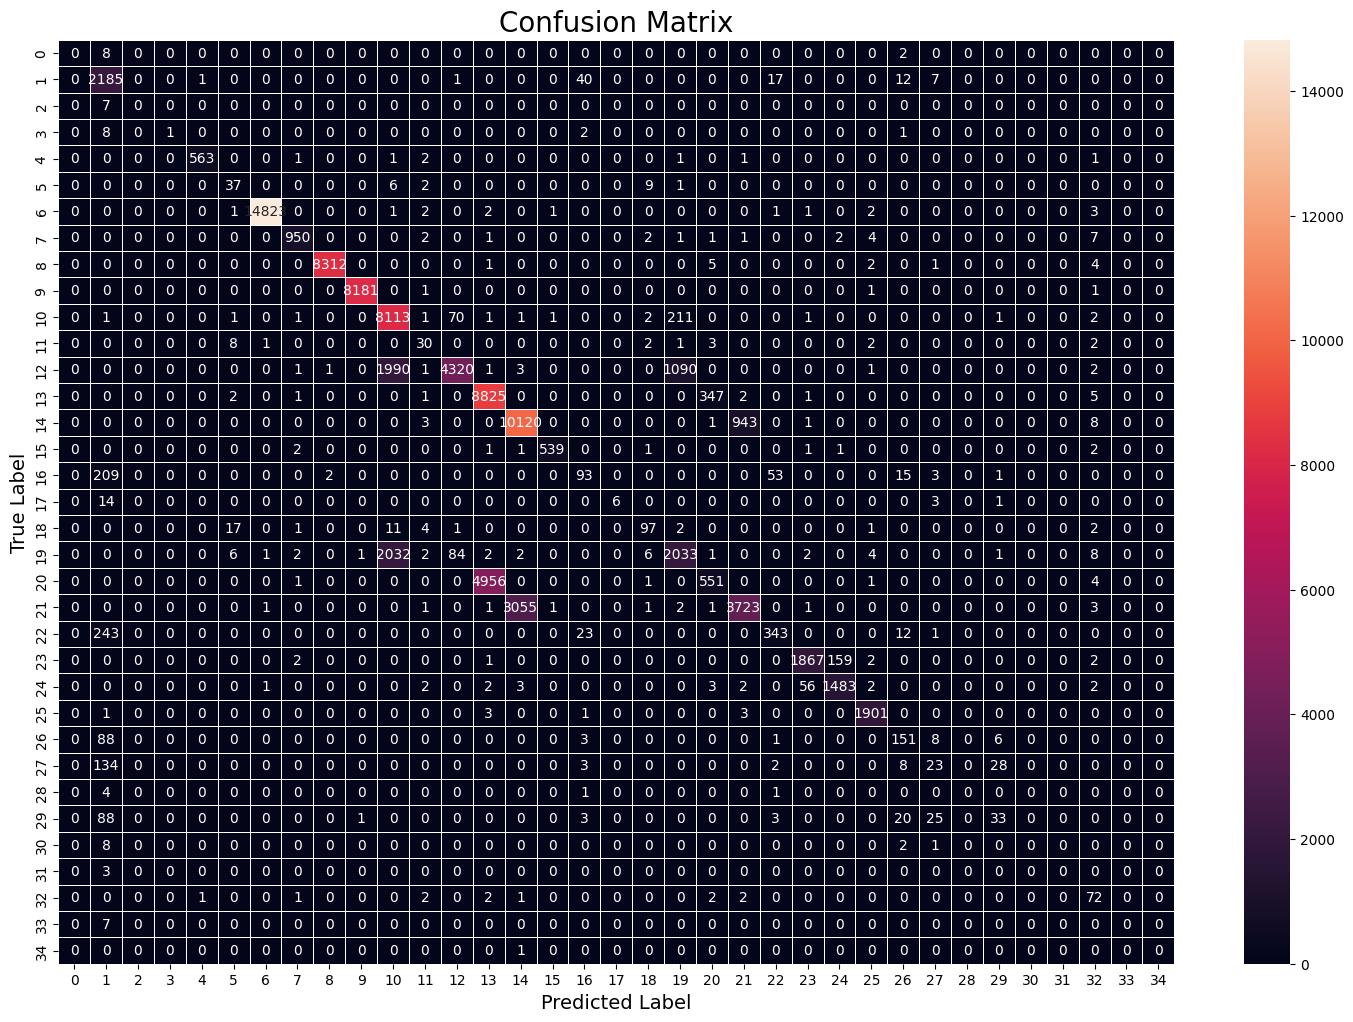

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Set figure size
plt.figure(figsize=(18, 12))

# Create annotated heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='rocket', linewidths=0.5)

plt.title('Confusion Matrix', fontsize=20)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.show()



# **Get Predictions & Confusion Matrix**

In [ ]:
from sklearn.metrics import classification_report

print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.73      0.97      0.83      2263
           2       0.00      0.00      0.00         7
           3       1.00      0.08      0.15        12
           4       1.00      0.99      0.99       570
           5       0.51      0.67      0.58        55
           6       1.00      1.00      1.00     14837
           7       0.99      0.98      0.98       971
           8       1.00      1.00      1.00      8325
           9       1.00      1.00      1.00      8184
          10       0.67      0.97      0.79      8407
          11       0.54      0.61      0.57        49
          12       0.97      0.58      0.73      7410
          13       0.64      0.96      0.77      9184
          14       0.77      0.91      0.83     11076
          15       0.99      0.98      0.99       548
          16       0.55      0.25      0.34       376
    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
